<a href="https://colab.research.google.com/github/anky19698/Cricket_Analytics/blob/main/Cricket_Shots_Prediction_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
path = "/content/drive/MyDrive/getty/"
folders = os.listdir(path)
print(folders)

['drive', 'cutshot', 'sweep', 'pullshot', 'stance']


In [117]:
# for dealing with images
from tqdm import tqdm
import cv2
# create lists
images  = []
labels  = []
target_height = 300
target_width = 300
# for each folder
for folder in folders:
    # list down image names
    names=os.listdir(path + folder)
    if folder == 'stance':
        continue
    # for each image
    for i in range(100):
        # read an image
        image=cv2.imread(path+folder+'/'+names[i])

        # Resize image while maintaining aspect ratio
        height, width, _ = image.shape
        aspect_ratio = width / height
        if aspect_ratio > 1:  # landscape orientation
            new_width = target_width
            new_height = int(new_width / aspect_ratio)
        else:  # portrait or square orientation
            new_height = target_height
            new_width = int(new_height * aspect_ratio)

        # Resize image to target dimensions
        resized_image = cv2.resize(image, (new_width, new_height))

        # Create padding to achieve target dimensions
        top_pad = (target_height - new_height) // 2
        bottom_pad = target_height - new_height - top_pad
        left_pad = (target_width - new_width) // 2
        right_pad = target_width - new_width - left_pad
        padded_image = cv2.copyMakeBorder(resized_image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
        fliped_padded_image = cv2.flip(padded_image, 1)
        # cv2_imshow(fliped_padded_image)
        # append image to list
        images.append(padded_image)
        images.append(fliped_padded_image)
        # append folder name (type of shot) to list
        labels.append(folder)
        labels.append(folder)

In [118]:
len(images)

800

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
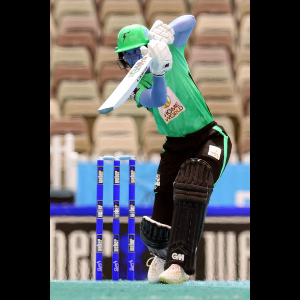

In [89]:
images[0]

In [90]:
from google.colab.patches import cv2_imshow


0: 640x640 1 person, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


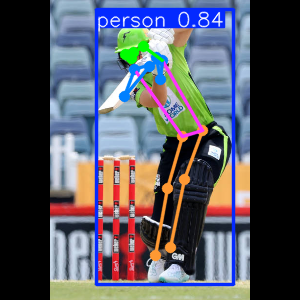

In [91]:
from ultralytics import YOLO
import cv2

# Load the YOLOv8 model
model = YOLO('yolov8n-pose.pt')

# Open the image file
# image_path = images[0]
image = images[0]

# Run YOLOv8 inference on the image
results = model(image)

# Visualize the results on the image
annotated_image = results[0].plot()

# Display the annotated image
cv2_imshow(annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [119]:
import numpy as np

In [120]:
def process_image(image):
    results = model(image)
    keypoints = results[0].keypoints
    # Extract only the xy coordinates
    xy = keypoints.xy[0].cpu().numpy()  # Shape: (17, 2)

     # Shape: (34,)
    # Flatten the keypoints for each detection
    # Assuming we take the first detection if there are multiple
    if len(keypoints) > 0:
        return xy.flatten()
    else:
        return np.zeros(34)  # 17 keypoints * 3 (x, y, conf)

In [121]:
keypoints = model(images[0])


0: 640x640 1 person, 20.9ms
Speed: 6.5ms preprocess, 20.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


In [122]:
process_image(images[0]).shape


0: 640x640 1 person, 9.0ms
Speed: 3.1ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


(34,)

In [123]:
all_keypoints = []
all_labels = []
for i in tqdm(range(len(images))):
    all_keypoints.append(process_image(images[i]))

    shots_map = {
        "drive": 0,
        "sweep": 1,
        "cutshot": 2,
        "pullshot": 3
    }

    all_labels.append(shots_map[labels[i]])

  0%|          | 0/800 [00:00<?, ?it/s]


0: 640x640 1 person, 12.2ms
Speed: 3.2ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.5ms
Speed: 2.7ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 4.0ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.3ms
Speed: 3.9ms preprocess, 8.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 5/800 [00:00<00:16, 49.38it/s]


0: 640x640 6 persons, 8.3ms
Speed: 4.7ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 2.3ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.8ms
Speed: 3.1ms preprocess, 12.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 14.0ms
Speed: 2.3ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 11/800 [00:00<00:16, 49.17it/s]


0: 640x640 1 person, 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.6ms
Speed: 4.3ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.6ms
Speed: 3.6ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.6ms
Speed: 3.6ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 17/800 [00:00<00:15, 51.69it/s]


0: 640x640 2 persons, 8.8ms
Speed: 3.3ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.6ms
Speed: 3.9ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.3ms
Speed: 3.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.6ms
Speed: 3.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.6ms
Speed: 3.0ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 23/800 [00:00<00:14, 52.35it/s]


0: 640x640 1 person, 7.3ms
Speed: 3.8ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 7.6ms
Speed: 4.1ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.1ms
Speed: 3.7ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.3ms
Speed: 2.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 29/800 [00:00<00:14, 53.53it/s]


0: 640x640 1 person, 7.0ms
Speed: 2.5ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 7.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 7.1ms
Speed: 2.3ms preprocess, 7.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.0ms
Speed: 3.2ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.4ms
Speed: 2.6ms preprocess, 14.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 35/800 [00:00<00:14, 51.92it/s]


0: 640x640 1 person, 9.0ms
Speed: 5.2ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.0ms
Speed: 2.5ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 7.6ms
Speed: 3.3ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 9.3ms
Speed: 2.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 11.1ms
Speed: 2.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 41/800 [00:00<00:14, 51.75it/s]


0: 640x640 4 persons, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 7.7ms
Speed: 3.1ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 7.5ms
Speed: 2.8ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 47/800 [00:00<00:14, 50.71it/s]


0: 640x640 10 persons, 9.8ms
Speed: 2.7ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 7.5ms
Speed: 2.2ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 13.9ms
Speed: 2.7ms preprocess, 13.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 53/800 [00:01<00:15, 49.59it/s]


0: 640x640 5 persons, 10.7ms
Speed: 3.1ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.2ms
Speed: 4.1ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 11.7ms
Speed: 3.6ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 58/800 [00:01<00:15, 48.19it/s]


0: 640x640 11 persons, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 11.2ms
Speed: 2.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.9ms
Speed: 2.6ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.8ms
Speed: 3.3ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 63/800 [00:01<00:15, 47.17it/s]


0: 640x640 7 persons, 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 68/800 [00:01<00:15, 46.74it/s]


0: 640x640 9 persons, 13.8ms
Speed: 4.1ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 10.4ms
Speed: 2.6ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.6ms
Speed: 3.2ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 73/800 [00:01<00:15, 45.87it/s]


0: 640x640 3 persons, 11.6ms
Speed: 2.7ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 4.2ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 78/800 [00:01<00:16, 44.93it/s]


0: 640x640 6 persons, 11.1ms
Speed: 2.7ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.8ms
Speed: 2.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 16.8ms
Speed: 7.1ms preprocess, 16.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 12.8ms
Speed: 3.8ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 83/800 [00:01<00:16, 42.65it/s]


0: 640x640 2 persons, 11.1ms
Speed: 3.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 10.1ms
Speed: 2.5ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 12.2ms
Speed: 2.5ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 10.9ms
Speed: 2.6ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 9.8ms
Speed: 3.2ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 88/800 [00:01<00:16, 42.54it/s]


0: 640x640 2 persons, 11.6ms
Speed: 2.5ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 9.2ms
Speed: 3.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.7ms
Speed: 2.5ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 2.6ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.3ms
Speed: 3.6ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 93/800 [00:01<00:16, 43.14it/s]


0: 640x640 1 person, 9.9ms
Speed: 3.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.4ms
Speed: 2.9ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 persons, 16.1ms
Speed: 2.8ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 persons, 11.7ms
Speed: 3.4ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 98/800 [00:02<00:16, 42.51it/s]


0: 640x640 2 persons, 10.5ms
Speed: 4.4ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.5ms
Speed: 2.4ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 4.9ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 3.2ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 103/800 [00:02<00:16, 42.92it/s]


0: 640x640 1 person, 9.9ms
Speed: 2.4ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.4ms
Speed: 3.4ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.1ms
Speed: 2.6ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.9ms
Speed: 2.7ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 108/800 [00:02<00:16, 42.89it/s]


0: 640x640 1 person, 9.8ms
Speed: 2.6ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.8ms
Speed: 2.7ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.2ms
Speed: 2.7ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 11.2ms
Speed: 3.4ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 2.6ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 113/800 [00:02<00:15, 43.40it/s]


0: 640x640 1 person, 12.0ms
Speed: 3.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.3ms
Speed: 2.7ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 3.1ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 118/800 [00:02<00:15, 43.07it/s]


0: 640x640 1 person, 10.9ms
Speed: 3.0ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.6ms
Speed: 2.7ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 3.2ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 123/800 [00:02<00:15, 43.57it/s]


0: 640x640 2 persons, 10.9ms
Speed: 2.6ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.3ms
Speed: 2.6ms preprocess, 14.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.9ms
Speed: 3.3ms preprocess, 19.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.0ms
Speed: 2.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.5ms
Speed: 2.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 128/800 [00:02<00:15, 42.27it/s]


0: 640x640 1 person, 13.8ms
Speed: 3.0ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.0ms
Speed: 2.7ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 133/800 [00:02<00:15, 41.90it/s]


0: 640x640 1 person, 15.2ms
Speed: 3.3ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.8ms
Speed: 2.8ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.6ms
Speed: 5.3ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 4.9ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 138/800 [00:03<00:15, 41.68it/s]


0: 640x640 1 person, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 3.2ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 7.9ms
Speed: 2.6ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 143/800 [00:03<00:15, 43.10it/s]


0: 640x640 11 persons, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.9ms
Speed: 2.7ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 149/800 [00:03<00:13, 46.67it/s]


0: 640x640 3 persons, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 8.0ms
Speed: 2.8ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.5ms
Speed: 2.5ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 7.5ms
Speed: 2.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 persons, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 155/800 [00:03<00:13, 48.64it/s]


0: 640x640 2 persons, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 7.9ms
Speed: 2.8ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 8.0ms
Speed: 2.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 161/800 [00:03<00:12, 50.12it/s]


0: 640x640 1 person, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.8ms
Speed: 2.7ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 9.8ms
Speed: 2.6ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 7.4ms
Speed: 3.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 167/800 [00:03<00:12, 50.46it/s]


0: 640x640 8 persons, 8.3ms
Speed: 4.9ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.2ms
Speed: 5.1ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 7.5ms
Speed: 2.7ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 7.6ms
Speed: 3.3ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.5ms
Speed: 3.6ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 173/800 [00:03<00:12, 51.15it/s]


0: 640x640 1 person, 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 16.7ms
Speed: 4.0ms preprocess, 16.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.1ms
Speed: 3.2ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 179/800 [00:03<00:12, 49.73it/s]


0: 640x640 1 person, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.4ms
Speed: 2.6ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.8ms
Speed: 2.8ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 185/800 [00:03<00:12, 50.45it/s]


0: 640x640 1 person, 8.7ms
Speed: 4.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 7.9ms
Speed: 2.9ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 191/800 [00:04<00:11, 50.81it/s]


0: 640x640 1 person, 9.3ms
Speed: 2.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.8ms
Speed: 2.6ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.4ms
Speed: 2.8ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.0ms
Speed: 2.7ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 197/800 [00:04<00:12, 48.55it/s]


0: 640x640 8 persons, 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.2ms
Speed: 2.7ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 10.6ms
Speed: 2.6ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 202/800 [00:04<00:12, 46.99it/s]


0: 640x640 10 persons, 11.2ms
Speed: 3.3ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.4ms
Speed: 3.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 207/800 [00:04<00:13, 45.58it/s]


0: 640x640 3 persons, 12.9ms
Speed: 4.0ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.5ms
Speed: 3.8ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.0ms
Speed: 2.6ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 212/800 [00:04<00:13, 44.84it/s]


0: 640x640 1 person, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.2ms
Speed: 3.2ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 13.2ms
Speed: 3.5ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 12.5ms
Speed: 3.2ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 13.7ms
Speed: 3.2ms preprocess, 13.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 217/800 [00:04<00:13, 43.26it/s]


0: 640x640 13 persons, 12.2ms
Speed: 2.9ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 14.1ms
Speed: 3.3ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 15.1ms
Speed: 3.1ms preprocess, 15.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 222/800 [00:04<00:14, 41.08it/s]


0: 640x640 7 persons, 15.2ms
Speed: 2.7ms preprocess, 15.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.6ms
Speed: 2.8ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 13.5ms
Speed: 2.8ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 227/800 [00:04<00:13, 41.33it/s]


0: 640x640 8 persons, 10.7ms
Speed: 2.6ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 12.0ms
Speed: 3.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.6ms
Speed: 2.6ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 232/800 [00:05<00:13, 41.18it/s]


0: 640x640 4 persons, 12.8ms
Speed: 3.3ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.6ms
Speed: 3.5ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.5ms
Speed: 2.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 237/800 [00:05<00:13, 41.22it/s]


0: 640x640 1 person, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.0ms
Speed: 2.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 11.5ms
Speed: 2.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 242/800 [00:05<00:13, 41.58it/s]


0: 640x640 1 person, 11.8ms
Speed: 2.9ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.6ms
Speed: 2.7ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.0ms
Speed: 3.4ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.2ms
Speed: 3.2ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 247/800 [00:05<00:13, 41.45it/s]


0: 640x640 2 persons, 12.3ms
Speed: 3.7ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 10.1ms
Speed: 3.4ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 11.8ms
Speed: 3.5ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 252/800 [00:05<00:13, 41.60it/s]


0: 640x640 7 persons, 11.5ms
Speed: 3.4ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 13.2ms
Speed: 3.2ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 257/800 [00:05<00:13, 41.65it/s]


0: 640x640 2 persons, 12.2ms
Speed: 2.6ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.8ms
Speed: 2.9ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.0ms
Speed: 3.3ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 262/800 [00:05<00:12, 41.51it/s]


0: 640x640 6 persons, 10.2ms
Speed: 3.5ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.9ms
Speed: 2.7ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 17.7ms
Speed: 3.4ms preprocess, 17.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 17.3ms
Speed: 5.2ms preprocess, 17.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 persons, 12.5ms
Speed: 2.7ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 267/800 [00:05<00:13, 40.12it/s]


0: 640x640 10 persons, 14.2ms
Speed: 3.0ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 12.9ms
Speed: 3.9ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.6ms
Speed: 3.5ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 272/800 [00:06<00:13, 40.35it/s]


0: 640x640 3 persons, 12.8ms
Speed: 3.5ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 11.5ms
Speed: 2.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.7ms
Speed: 4.0ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 277/800 [00:06<00:12, 41.34it/s]


0: 640x640 1 person, 9.5ms
Speed: 3.3ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.5ms
Speed: 3.0ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 283/800 [00:06<00:11, 44.09it/s]


0: 640x640 1 person, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.7ms
Speed: 2.7ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 289/800 [00:06<00:10, 46.49it/s]


0: 640x640 9 persons, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.9ms
Speed: 3.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 7.7ms
Speed: 4.5ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 7.6ms
Speed: 4.1ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 294/800 [00:06<00:10, 46.62it/s]


0: 640x640 6 persons, 7.9ms
Speed: 3.4ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 53.1ms
Speed: 3.0ms preprocess, 53.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 42.2ms
Speed: 2.8ms preprocess, 42.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 299/800 [00:06<00:13, 36.09it/s]


0: 640x640 2 persons, 36.5ms
Speed: 2.9ms preprocess, 36.5ms inference, 21.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 47.1ms
Speed: 7.0ms preprocess, 47.1ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 57.9ms
Speed: 3.0ms preprocess, 57.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 13.0ms
Speed: 3.2ms preprocess, 13.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 303/800 [00:06<00:18, 27.17it/s]


0: 640x640 11 persons, 34.8ms
Speed: 9.2ms preprocess, 34.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 2.7ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.5ms
Speed: 3.1ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 9.2ms
Speed: 3.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 307/800 [00:07<00:17, 27.76it/s]


0: 640x640 1 person, 11.3ms
Speed: 3.1ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 14.7ms
Speed: 2.7ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.5ms
Speed: 3.2ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 2.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 311/800 [00:07<00:16, 29.99it/s]


0: 640x640 1 person, 11.0ms
Speed: 3.4ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.2ms
Speed: 4.1ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.2ms
Speed: 2.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.8ms
Speed: 3.8ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 2.6ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 316/800 [00:07<00:14, 33.12it/s]


0: 640x640 2 persons, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.8ms
Speed: 2.6ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.2ms
Speed: 4.0ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 321/800 [00:07<00:13, 35.58it/s]


0: 640x640 7 persons, 11.7ms
Speed: 2.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.9ms
Speed: 3.5ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 36.5ms
Speed: 2.5ms preprocess, 36.5ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 326/800 [00:07<00:13, 34.02it/s]


0: 640x640 3 persons, 68.5ms
Speed: 12.9ms preprocess, 68.5ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 46.0ms
Speed: 2.8ms preprocess, 46.0ms inference, 21.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 39.1ms
Speed: 9.8ms preprocess, 39.1ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 28.5ms
Speed: 13.0ms preprocess, 28.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 330/800 [00:07<00:21, 21.93it/s]


0: 640x640 7 persons, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 18.9ms
Speed: 5.0ms preprocess, 18.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 26.3ms
Speed: 2.8ms preprocess, 26.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 333/800 [00:08<00:20, 22.92it/s]


0: 640x640 2 persons, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 11.7ms
Speed: 4.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 12.2ms
Speed: 2.6ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 10.1ms
Speed: 2.5ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 338/800 [00:08<00:16, 27.43it/s]


0: 640x640 1 person, 14.3ms
Speed: 2.9ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.6ms
Speed: 2.7ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 persons, 10.5ms
Speed: 3.6ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 343/800 [00:08<00:14, 30.79it/s]


0: 640x640 3 persons, 13.3ms
Speed: 3.2ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 10.2ms
Speed: 2.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.5ms
Speed: 3.2ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 348/800 [00:08<00:13, 34.61it/s]


0: 640x640 2 persons, 9.3ms
Speed: 3.3ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.6ms
Speed: 3.3ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.7ms
Speed: 3.6ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.9ms
Speed: 3.4ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 353/800 [00:08<00:11, 37.85it/s]


0: 640x640 4 persons, 13.4ms
Speed: 2.9ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.8ms
Speed: 3.4ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 358/800 [00:08<00:10, 40.37it/s]


0: 640x640 1 person, 16.9ms
Speed: 3.8ms preprocess, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.6ms
Speed: 2.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 12.0ms
Speed: 2.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 14.2ms
Speed: 5.1ms preprocess, 14.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.0ms
Speed: 2.7ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 363/800 [00:08<00:10, 40.42it/s]


0: 640x640 1 person, 13.9ms
Speed: 2.5ms preprocess, 13.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.4ms
Speed: 2.7ms preprocess, 14.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.2ms
Speed: 4.4ms preprocess, 13.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.0ms
Speed: 3.9ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.5ms
Speed: 2.7ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 368/800 [00:08<00:10, 39.77it/s]


0: 640x640 1 person, 14.0ms
Speed: 2.5ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.9ms
Speed: 3.1ms preprocess, 12.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.6ms
Speed: 2.7ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.3ms
Speed: 2.7ms preprocess, 18.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 373/800 [00:09<00:11, 37.86it/s]


0: 640x640 1 person, 13.5ms
Speed: 2.5ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 2.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.3ms
Speed: 2.8ms preprocess, 18.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.6ms
Speed: 3.4ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 378/800 [00:09<00:10, 38.51it/s]


0: 640x640 1 person, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.1ms
Speed: 3.4ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.4ms
Speed: 2.6ms preprocess, 17.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.9ms
Speed: 3.7ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 382/800 [00:09<00:11, 37.70it/s]


0: 640x640 1 person, 12.2ms
Speed: 3.2ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.7ms
Speed: 2.9ms preprocess, 18.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.5ms
Speed: 3.0ms preprocess, 16.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.7ms
Speed: 2.6ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 386/800 [00:09<00:11, 35.87it/s]


0: 640x640 1 person, 19.7ms
Speed: 3.6ms preprocess, 19.7ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.8ms
Speed: 3.4ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.9ms
Speed: 2.6ms preprocess, 18.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 390/800 [00:09<00:12, 33.21it/s]


0: 640x640 5 persons, 19.3ms
Speed: 3.8ms preprocess, 19.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 16.1ms
Speed: 2.8ms preprocess, 16.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 394/800 [00:09<00:12, 32.43it/s]


0: 640x640 1 person, 12.5ms
Speed: 2.7ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.3ms
Speed: 2.7ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 14.0ms
Speed: 2.8ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 399/800 [00:09<00:11, 34.78it/s]


0: 640x640 3 persons, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.9ms
Speed: 3.0ms preprocess, 12.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 17.8ms
Speed: 2.9ms preprocess, 17.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.2ms
Speed: 3.5ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 403/800 [00:09<00:11, 35.47it/s]


0: 640x640 1 person, 14.4ms
Speed: 3.0ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 10.2ms
Speed: 2.6ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 408/800 [00:10<00:10, 37.10it/s]


0: 640x640 2 persons, 13.4ms
Speed: 2.6ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 13.2ms
Speed: 2.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.9ms
Speed: 4.0ms preprocess, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 412/800 [00:10<00:10, 37.55it/s]


0: 640x640 7 persons, 10.2ms
Speed: 4.7ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 13.3ms
Speed: 2.7ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.0ms
Speed: 2.7ms preprocess, 15.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 13.5ms
Speed: 2.7ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 416/800 [00:10<00:10, 38.00it/s]


0: 640x640 4 persons, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 13.1ms
Speed: 2.7ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.6ms
Speed: 2.7ms preprocess, 12.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.3ms
Speed: 2.8ms preprocess, 12.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 421/800 [00:10<00:09, 38.78it/s]


0: 640x640 1 person, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 persons, 12.9ms
Speed: 2.8ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 14.3ms
Speed: 2.6ms preprocess, 14.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 426/800 [00:10<00:09, 39.78it/s]


0: 640x640 4 persons, 16.0ms
Speed: 3.1ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 14.7ms
Speed: 2.8ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.6ms
Speed: 4.4ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.6ms
Speed: 2.8ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 430/800 [00:10<00:09, 39.44it/s]


0: 640x640 1 person, 17.6ms
Speed: 2.9ms preprocess, 17.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 20.9ms
Speed: 2.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.9ms
Speed: 2.7ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.7ms
Speed: 2.6ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 434/800 [00:10<00:09, 37.75it/s]


0: 640x640 1 person, 18.4ms
Speed: 2.8ms preprocess, 18.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 14.5ms
Speed: 2.7ms preprocess, 14.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 15.9ms
Speed: 2.6ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 438/800 [00:10<00:09, 37.25it/s]


0: 640x640 1 person, 13.8ms
Speed: 2.6ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.9ms
Speed: 2.6ms preprocess, 19.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.8ms
Speed: 2.9ms preprocess, 12.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 442/800 [00:10<00:09, 36.64it/s]


0: 640x640 1 person, 17.6ms
Speed: 2.7ms preprocess, 17.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 2.7ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.0ms
Speed: 4.6ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 446/800 [00:11<00:09, 36.85it/s]


0: 640x640 1 person, 13.9ms
Speed: 2.9ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 4.2ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.7ms
Speed: 3.0ms preprocess, 16.7ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 23.8ms
Speed: 3.0ms preprocess, 23.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 450/800 [00:11<00:10, 34.71it/s]


0: 640x640 1 person, 15.7ms
Speed: 5.7ms preprocess, 15.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.1ms
Speed: 2.6ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.2ms
Speed: 2.8ms preprocess, 17.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 454/800 [00:11<00:10, 32.95it/s]


0: 640x640 1 person, 18.5ms
Speed: 2.9ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.3ms
Speed: 4.6ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.2ms
Speed: 2.9ms preprocess, 18.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 458/800 [00:11<00:10, 32.52it/s]


0: 640x640 2 persons, 22.0ms
Speed: 3.2ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 8.9ms
Speed: 7.0ms preprocess, 8.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.7ms
Speed: 3.0ms preprocess, 19.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.8ms
Speed: 4.6ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 462/800 [00:11<00:10, 32.02it/s]


0: 640x640 3 persons, 15.5ms
Speed: 4.4ms preprocess, 15.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 16.1ms
Speed: 3.4ms preprocess, 16.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.9ms
Speed: 3.1ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.2ms
Speed: 5.5ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 466/800 [00:11<00:10, 31.77it/s]


0: 640x640 1 person, 12.4ms
Speed: 3.6ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.5ms
Speed: 4.7ms preprocess, 17.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.4ms
Speed: 2.7ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.5ms
Speed: 5.4ms preprocess, 17.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 470/800 [00:11<00:10, 31.07it/s]


0: 640x640 1 person, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.9ms
Speed: 3.3ms preprocess, 14.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.9ms
Speed: 2.9ms preprocess, 14.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 474/800 [00:11<00:10, 32.37it/s]


0: 640x640 1 person, 17.3ms
Speed: 3.8ms preprocess, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.4ms
Speed: 3.9ms preprocess, 14.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 19.7ms
Speed: 4.0ms preprocess, 19.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 16.4ms
Speed: 5.1ms preprocess, 16.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 478/800 [00:12<00:10, 31.73it/s]


0: 640x640 1 person, 18.3ms
Speed: 3.6ms preprocess, 18.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 20.4ms
Speed: 2.8ms preprocess, 20.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.0ms
Speed: 3.4ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.7ms
Speed: 2.8ms preprocess, 15.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 482/800 [00:12<00:10, 31.68it/s]


0: 640x640 1 person, 12.9ms
Speed: 4.0ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.9ms
Speed: 4.8ms preprocess, 13.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 15.4ms
Speed: 5.8ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 17.7ms
Speed: 3.9ms preprocess, 17.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 486/800 [00:12<00:09, 31.88it/s]


0: 640x640 5 persons, 16.9ms
Speed: 2.6ms preprocess, 16.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 13.6ms
Speed: 3.6ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 14.5ms
Speed: 2.6ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.3ms
Speed: 3.0ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 490/800 [00:12<00:09, 32.63it/s]


0: 640x640 1 person, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 11.2ms
Speed: 2.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.7ms
Speed: 2.9ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 495/800 [00:12<00:08, 36.42it/s]


0: 640x640 1 person, 9.3ms
Speed: 2.9ms preprocess, 9.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.0ms
Speed: 2.7ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▎   | 500/800 [00:12<00:07, 39.29it/s]


0: 640x640 14 persons, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.9ms
Speed: 3.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 505/800 [00:12<00:07, 41.23it/s]


0: 640x640 1 person, 8.4ms
Speed: 4.8ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.9ms
Speed: 2.8ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.0ms
Speed: 2.5ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.0ms
Speed: 2.4ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 510/800 [00:12<00:07, 40.08it/s]


0: 640x640 7 persons, 11.1ms
Speed: 2.6ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 15.6ms
Speed: 2.6ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 12.8ms
Speed: 3.3ms preprocess, 12.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 18.0ms
Speed: 3.2ms preprocess, 18.0ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 19.7ms
Speed: 2.8ms preprocess, 19.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 515/800 [00:13<00:07, 37.83it/s]


0: 640x640 6 persons, 19.6ms
Speed: 2.9ms preprocess, 19.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 18.1ms
Speed: 3.5ms preprocess, 18.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.6ms
Speed: 2.6ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.5ms
Speed: 2.7ms preprocess, 13.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 519/800 [00:13<00:07, 36.72it/s]


0: 640x640 1 person, 20.8ms
Speed: 2.9ms preprocess, 20.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.8ms
Speed: 5.0ms preprocess, 19.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.1ms
Speed: 3.1ms preprocess, 15.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.8ms
Speed: 2.8ms preprocess, 13.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 523/800 [00:13<00:07, 35.20it/s]


0: 640x640 1 person, 13.6ms
Speed: 2.8ms preprocess, 13.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 3.3ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 2.7ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.9ms
Speed: 2.7ms preprocess, 14.9ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 528/800 [00:13<00:07, 36.91it/s]


0: 640x640 9 persons, 19.6ms
Speed: 4.9ms preprocess, 19.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 21.3ms
Speed: 2.8ms preprocess, 21.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 18.9ms
Speed: 4.3ms preprocess, 18.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 17.2ms
Speed: 2.7ms preprocess, 17.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 532/800 [00:13<00:07, 34.51it/s]


0: 640x640 7 persons, 17.2ms
Speed: 4.4ms preprocess, 17.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 17.5ms
Speed: 2.8ms preprocess, 17.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 17.7ms
Speed: 4.9ms preprocess, 17.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 15.8ms
Speed: 3.4ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 536/800 [00:13<00:07, 34.26it/s]


0: 640x640 3 persons, 14.3ms
Speed: 3.1ms preprocess, 14.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 17.7ms
Speed: 2.8ms preprocess, 17.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 9.9ms
Speed: 3.7ms preprocess, 9.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 12.6ms
Speed: 3.1ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 540/800 [00:13<00:07, 35.15it/s]


0: 640x640 8 persons, 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 14.8ms
Speed: 2.7ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.2ms
Speed: 3.7ms preprocess, 19.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.3ms
Speed: 3.6ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 544/800 [00:13<00:07, 34.98it/s]


0: 640x640 1 person, 18.8ms
Speed: 2.9ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.1ms
Speed: 2.8ms preprocess, 19.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 16.2ms
Speed: 3.3ms preprocess, 16.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 20.6ms
Speed: 3.7ms preprocess, 20.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 548/800 [00:13<00:07, 33.92it/s]


0: 640x640 1 person, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.1ms
Speed: 4.2ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 21.6ms
Speed: 3.4ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 20.7ms
Speed: 3.5ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 552/800 [00:14<00:07, 32.14it/s]


0: 640x640 2 persons, 22.6ms
Speed: 2.6ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 20.4ms
Speed: 2.7ms preprocess, 20.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 20.0ms
Speed: 4.8ms preprocess, 20.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.3ms
Speed: 2.7ms preprocess, 18.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 556/800 [00:14<00:08, 30.09it/s]


0: 640x640 1 person, 15.5ms
Speed: 4.3ms preprocess, 15.5ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 20.5ms
Speed: 2.7ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 20.7ms
Speed: 4.5ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.2ms
Speed: 4.7ms preprocess, 17.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 560/800 [00:14<00:08, 29.14it/s]


0: 640x640 1 person, 19.2ms
Speed: 4.7ms preprocess, 19.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.4ms
Speed: 2.6ms preprocess, 17.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.7ms
Speed: 2.5ms preprocess, 13.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 563/800 [00:14<00:08, 29.03it/s]


0: 640x640 1 person, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.7ms
Speed: 3.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.7ms
Speed: 2.8ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 568/800 [00:14<00:07, 32.96it/s]


0: 640x640 1 person, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.4ms
Speed: 2.7ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.1ms
Speed: 2.7ms preprocess, 14.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 573/800 [00:14<00:06, 35.79it/s]


0: 640x640 1 person, 12.6ms
Speed: 2.7ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.5ms
Speed: 2.7ms preprocess, 15.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.7ms
Speed: 2.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.4ms
Speed: 2.8ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 577/800 [00:14<00:06, 36.71it/s]


0: 640x640 1 person, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 5.6ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.1ms
Speed: 2.7ms preprocess, 18.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.5ms
Speed: 3.5ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 581/800 [00:14<00:06, 36.33it/s]


0: 640x640 1 person, 12.5ms
Speed: 3.5ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.2ms
Speed: 3.6ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 2.6ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 585/800 [00:15<00:05, 36.50it/s]


0: 640x640 1 person, 14.0ms
Speed: 4.5ms preprocess, 14.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.9ms
Speed: 2.9ms preprocess, 15.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 589/800 [00:15<00:05, 36.18it/s]


0: 640x640 1 person, 17.0ms
Speed: 4.3ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 21.3ms
Speed: 2.6ms preprocess, 21.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 22.3ms
Speed: 3.1ms preprocess, 22.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.8ms
Speed: 2.9ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 593/800 [00:15<00:06, 34.48it/s]


0: 640x640 1 person, 15.5ms
Speed: 2.6ms preprocess, 15.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.2ms
Speed: 2.8ms preprocess, 19.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.6ms
Speed: 2.7ms preprocess, 16.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 17.0ms
Speed: 3.3ms preprocess, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 597/800 [00:15<00:06, 33.73it/s]


0: 640x640 1 person, 20.8ms
Speed: 3.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.5ms
Speed: 2.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 20.3ms
Speed: 3.1ms preprocess, 20.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 601/800 [00:15<00:06, 32.93it/s]


0: 640x640 1 person, 20.2ms
Speed: 3.8ms preprocess, 20.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 18.8ms
Speed: 3.5ms preprocess, 18.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 19.2ms
Speed: 3.3ms preprocess, 19.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 21.7ms
Speed: 2.7ms preprocess, 21.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 605/800 [00:15<00:06, 31.86it/s]


0: 640x640 6 persons, 21.4ms
Speed: 3.0ms preprocess, 21.4ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 23.4ms
Speed: 3.3ms preprocess, 23.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 21.7ms
Speed: 3.0ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 609/800 [00:15<00:06, 31.05it/s]


0: 640x640 1 person, 16.4ms
Speed: 4.9ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.7ms
Speed: 3.7ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.1ms
Speed: 3.9ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 14.9ms
Speed: 2.7ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 613/800 [00:15<00:05, 32.68it/s]


0: 640x640 1 person, 10.9ms
Speed: 3.2ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 15.1ms
Speed: 3.4ms preprocess, 15.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.8ms
Speed: 2.5ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 617/800 [00:16<00:05, 34.47it/s]


0: 640x640 1 person, 11.8ms
Speed: 3.3ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.5ms
Speed: 3.3ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.6ms
Speed: 3.4ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 13.3ms
Speed: 2.9ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 621/800 [00:16<00:05, 35.74it/s]


0: 640x640 8 persons, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 14.0ms
Speed: 2.7ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.4ms
Speed: 3.5ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 625/800 [00:16<00:04, 36.42it/s]


0: 640x640 1 person, 9.9ms
Speed: 3.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.4ms
Speed: 2.6ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.4ms
Speed: 3.3ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 10.7ms
Speed: 4.0ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 630/800 [00:16<00:04, 39.37it/s]


0: 640x640 2 persons, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.3ms
Speed: 2.8ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 9.3ms
Speed: 2.6ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 635/800 [00:16<00:03, 41.48it/s]


0: 640x640 10 persons, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 2.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.4ms
Speed: 2.7ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.5ms
Speed: 2.8ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 640/800 [00:16<00:03, 43.23it/s]


0: 640x640 1 person, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 2.7ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.0ms
Speed: 2.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 645/800 [00:16<00:03, 43.37it/s]


0: 640x640 5 persons, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.0ms
Speed: 3.3ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.0ms
Speed: 5.3ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.4ms
Speed: 3.1ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 650/800 [00:16<00:03, 44.10it/s]


0: 640x640 10 persons, 12.7ms
Speed: 4.2ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 persons, 10.1ms
Speed: 3.1ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 8.7ms
Speed: 3.2ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 persons, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.1ms
Speed: 2.7ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 655/800 [00:16<00:03, 44.02it/s]


0: 640x640 1 person, 10.7ms
Speed: 4.3ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.2ms
Speed: 2.6ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 11.1ms
Speed: 2.6ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▎ | 660/800 [00:17<00:03, 45.18it/s]


0: 640x640 2 persons, 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 9.9ms
Speed: 4.1ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 14.5ms
Speed: 4.0ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 14.9ms
Speed: 2.9ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 665/800 [00:17<00:03, 44.08it/s]


0: 640x640 8 persons, 13.9ms
Speed: 3.1ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.1ms
Speed: 2.8ms preprocess, 14.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.4ms
Speed: 5.0ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.4ms
Speed: 5.8ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 670/800 [00:17<00:03, 42.13it/s]


0: 640x640 1 person, 17.6ms
Speed: 2.9ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 12.1ms
Speed: 2.5ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 12.9ms
Speed: 2.6ms preprocess, 12.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 675/800 [00:17<00:03, 41.59it/s]


0: 640x640 8 persons, 12.4ms
Speed: 3.2ms preprocess, 12.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.0ms
Speed: 2.7ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 13.0ms
Speed: 2.8ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.2ms
Speed: 2.8ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 680/800 [00:17<00:02, 41.00it/s]


0: 640x640 1 person, 14.3ms
Speed: 3.1ms preprocess, 14.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.8ms
Speed: 2.8ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.9ms
Speed: 3.9ms preprocess, 13.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.5ms
Speed: 3.1ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.9ms
Speed: 4.7ms preprocess, 14.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 685/800 [00:17<00:02, 39.55it/s]


0: 640x640 1 person, 21.1ms
Speed: 3.1ms preprocess, 21.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.8ms
Speed: 3.3ms preprocess, 12.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.8ms
Speed: 2.9ms preprocess, 12.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 689/800 [00:17<00:02, 37.76it/s]


0: 640x640 1 person, 13.6ms
Speed: 3.5ms preprocess, 13.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.4ms
Speed: 2.9ms preprocess, 16.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.5ms
Speed: 3.3ms preprocess, 15.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.0ms
Speed: 2.8ms preprocess, 14.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 693/800 [00:17<00:02, 36.74it/s]


0: 640x640 1 person, 14.3ms
Speed: 2.9ms preprocess, 14.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.5ms
Speed: 2.7ms preprocess, 14.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 697/800 [00:18<00:02, 37.36it/s]


0: 640x640 2 persons, 16.2ms
Speed: 5.5ms preprocess, 16.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.2ms
Speed: 3.2ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.7ms
Speed: 2.7ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.5ms
Speed: 3.6ms preprocess, 16.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 701/800 [00:18<00:02, 37.01it/s]


0: 640x640 1 person, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.9ms
Speed: 2.6ms preprocess, 13.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.8ms
Speed: 2.6ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.8ms
Speed: 2.6ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 705/800 [00:18<00:02, 37.55it/s]


0: 640x640 1 person, 14.1ms
Speed: 3.5ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.4ms
Speed: 4.7ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 14.1ms
Speed: 3.5ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 13.1ms
Speed: 3.9ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 709/800 [00:18<00:02, 37.26it/s]


0: 640x640 7 persons, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 713/800 [00:18<00:02, 37.63it/s]


0: 640x640 1 person, 12.7ms
Speed: 2.8ms preprocess, 12.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.1ms
Speed: 2.7ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 718/800 [00:18<00:02, 38.78it/s]


0: 640x640 1 person, 13.5ms
Speed: 2.8ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 2.8ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.3ms
Speed: 2.8ms preprocess, 14.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.1ms
Speed: 2.7ms preprocess, 13.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 722/800 [00:18<00:02, 38.74it/s]


0: 640x640 1 person, 11.8ms
Speed: 3.9ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 16.1ms
Speed: 2.7ms preprocess, 16.1ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.4ms
Speed: 2.6ms preprocess, 14.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 726/800 [00:18<00:01, 38.32it/s]


0: 640x640 1 person, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.6ms
Speed: 2.6ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 731/800 [00:18<00:01, 40.87it/s]


0: 640x640 1 person, 12.3ms
Speed: 2.8ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 persons, 9.6ms
Speed: 2.9ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 persons, 11.3ms
Speed: 3.0ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.9ms
Speed: 3.1ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 736/800 [00:18<00:01, 42.33it/s]


0: 640x640 1 person, 13.4ms
Speed: 2.9ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 11.2ms
Speed: 2.7ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 11.1ms
Speed: 2.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 741/800 [00:19<00:01, 43.65it/s]


0: 640x640 2 persons, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 13.9ms
Speed: 2.7ms preprocess, 13.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 14.3ms
Speed: 2.6ms preprocess, 14.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.2ms
Speed: 2.7ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 746/800 [00:19<00:01, 41.86it/s]


0: 640x640 1 person, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.7ms
Speed: 2.7ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 13.4ms
Speed: 3.2ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 751/800 [00:19<00:01, 41.38it/s]


0: 640x640 3 persons, 13.0ms
Speed: 2.7ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 9.7ms
Speed: 3.2ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.8ms
Speed: 3.4ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 756/800 [00:19<00:01, 41.15it/s]


0: 640x640 7 persons, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 13.1ms
Speed: 3.0ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 12.9ms
Speed: 2.8ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 13.7ms
Speed: 2.7ms preprocess, 13.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 13.9ms
Speed: 3.2ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 761/800 [00:19<00:00, 40.66it/s]


0: 640x640 6 persons, 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 persons, 11.1ms
Speed: 2.7ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 20 persons, 11.1ms
Speed: 2.7ms preprocess, 11.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 766/800 [00:19<00:00, 41.65it/s]


0: 640x640 1 person, 12.1ms
Speed: 2.7ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 14.0ms
Speed: 2.7ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 12.8ms
Speed: 3.1ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 12.3ms
Speed: 2.9ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.8ms
Speed: 3.0ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 771/800 [00:19<00:00, 40.54it/s]


0: 640x640 1 person, 10.2ms
Speed: 5.7ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 persons, 8.7ms
Speed: 2.5ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 persons, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 11.7ms
Speed: 2.6ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 776/800 [00:19<00:00, 42.21it/s]


0: 640x640 4 persons, 13.3ms
Speed: 3.4ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 persons, 10.3ms
Speed: 3.4ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.6ms
Speed: 3.1ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 persons, 10.5ms
Speed: 3.4ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 781/800 [00:20<00:00, 42.20it/s]


0: 640x640 8 persons, 13.2ms
Speed: 3.2ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 15.5ms
Speed: 3.4ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 12.5ms
Speed: 3.3ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 17.7ms
Speed: 3.6ms preprocess, 17.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 13.7ms
Speed: 2.9ms preprocess, 13.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 786/800 [00:20<00:00, 40.24it/s]


0: 640x640 1 person, 11.6ms
Speed: 2.6ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 13.7ms
Speed: 2.7ms preprocess, 13.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 13.6ms
Speed: 2.7ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 14.4ms
Speed: 3.4ms preprocess, 14.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 791/800 [00:20<00:00, 40.07it/s]


0: 640x640 3 persons, 14.2ms
Speed: 2.8ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 13.4ms
Speed: 2.6ms preprocess, 13.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 16.7ms
Speed: 2.9ms preprocess, 16.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 14.0ms
Speed: 3.8ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 796/800 [00:20<00:00, 38.16it/s]


0: 640x640 10 persons, 14.7ms
Speed: 2.7ms preprocess, 14.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 13.4ms
Speed: 2.6ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 14.9ms
Speed: 2.6ms preprocess, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 16.6ms
Speed: 4.0ms preprocess, 16.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 800/800 [00:20<00:00, 38.86it/s]


In [124]:
# Convert to numpy arrays
X = np.array(all_keypoints)
y = np.array(all_labels)

In [125]:
X.shape, y.shape

((800, 34), (800,))

## Model

In [126]:
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [127]:
def create_model(input_size, num_classes):
    nn_model = nn.Sequential(
        nn.Linear(input_size, 128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, num_classes)
    )
    return nn_model

In [128]:
def train_model(nn_model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    nn_model.to(device)

    for epoch in range(num_epochs):
        nn_model.train()
        train_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = nn_model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        nn_model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = nn_model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss/len(train_loader):.4f}, '
              f'Val Loss: {val_loss/len(val_loader):.4f}, '
              f'Val Accuracy: {100 * correct / total:.2f}%')

    return nn_model

In [129]:
def predict(nn_model, image_path):
    nn_model.eval()
    keypoints = process_image(image_path)
    keypoints_tensor = torch.FloatTensor(keypoints.xy[0]).unsqueeze(0)
    with torch.no_grad():
        output = nn_model(keypoints_tensor)
    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    confidence = probabilities[0][predicted_class].item()
    return predicted_class, confidence

In [131]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)

# Create dataset and split into train and validation
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model
input_size = X.shape[1]  # Should be 34 (17 keypoints * 2)
num_classes = len(np.unique(y))
nn_model = create_model(input_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

# Train the model
trained_model = train_model(nn_model, train_loader, val_loader, criterion, optimizer, num_epochs=300)

# Save the model
torch.save(trained_model.state_dict(), 'keypoint_classifier.pth')


Epoch [1/300], Train Loss: 15.2524, Val Loss: 1.9193, Val Accuracy: 20.00%
Epoch [2/300], Train Loss: 4.6675, Val Loss: 1.3732, Val Accuracy: 32.50%
Epoch [3/300], Train Loss: 2.2335, Val Loss: 1.3860, Val Accuracy: 29.38%
Epoch [4/300], Train Loss: 1.7077, Val Loss: 1.3902, Val Accuracy: 27.50%
Epoch [5/300], Train Loss: 1.6110, Val Loss: 1.3912, Val Accuracy: 27.50%
Epoch [6/300], Train Loss: 1.4754, Val Loss: 1.3887, Val Accuracy: 29.38%
Epoch [7/300], Train Loss: 1.5114, Val Loss: 1.3883, Val Accuracy: 30.00%
Epoch [8/300], Train Loss: 1.4731, Val Loss: 1.3888, Val Accuracy: 28.75%
Epoch [9/300], Train Loss: 1.4289, Val Loss: 1.3908, Val Accuracy: 26.25%
Epoch [10/300], Train Loss: 1.3826, Val Loss: 1.3852, Val Accuracy: 30.62%
Epoch [11/300], Train Loss: 1.4287, Val Loss: 1.3786, Val Accuracy: 29.38%
Epoch [12/300], Train Loss: 1.4192, Val Loss: 1.3805, Val Accuracy: 31.88%
Epoch [13/300], Train Loss: 1.3958, Val Loss: 1.3797, Val Accuracy: 29.38%
Epoch [14/300], Train Loss: 1.411

In [132]:
import torch

def predict(nn_model, image_path, device):
    nn_model.eval()
    nn_model.to(device)  # Move the model to the specified device

    keypoints = process_image(image_path)
    keypoints_tensor = torch.FloatTensor(keypoints).unsqueeze(0).to(device)  # Move tensor to the same device as the model

    with torch.no_grad():
        output = nn_model(keypoints_tensor)

    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    confidence = probabilities[0][predicted_class].item()

    return predicted_class, confidence



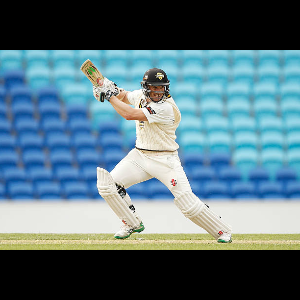


0: 640x640 1 person, 16.7ms
Speed: 3.3ms preprocess, 16.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: drive, Confidence: 0.65


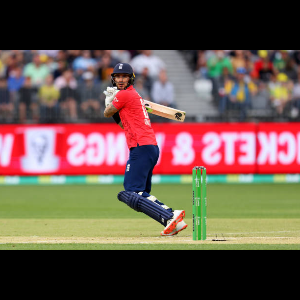


0: 640x640 8 persons, 11.2ms
Speed: 2.7ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: pullshot, Confidence: 0.39


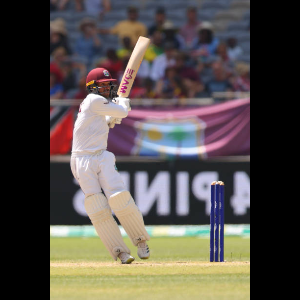


0: 640x640 7 persons, 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: pullshot, Confidence: 0.37


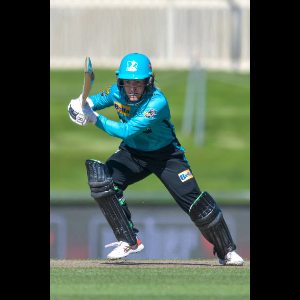


0: 640x640 1 person, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: cutshot, Confidence: 0.53


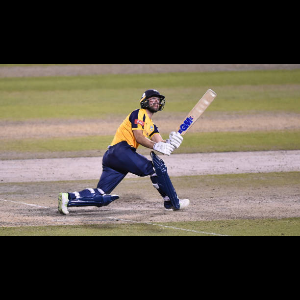


0: 640x640 1 person, 15.9ms
Speed: 3.1ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: sweep, Confidence: 0.88


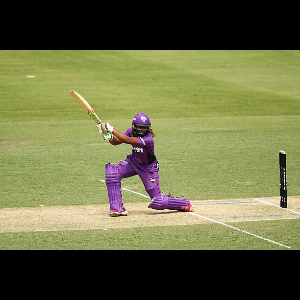


0: 640x640 1 person, 10.2ms
Speed: 2.8ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: drive, Confidence: 0.56


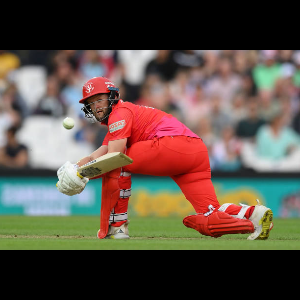


0: 640x640 6 persons, 9.4ms
Speed: 4.2ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: sweep, Confidence: 0.99


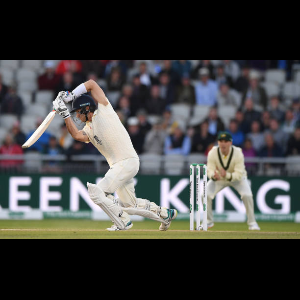


0: 640x640 7 persons, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: pullshot, Confidence: 0.29


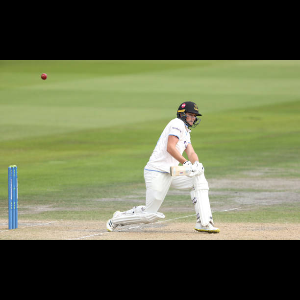


0: 640x640 1 person, 11.4ms
Speed: 3.0ms preprocess, 11.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: sweep, Confidence: 0.86


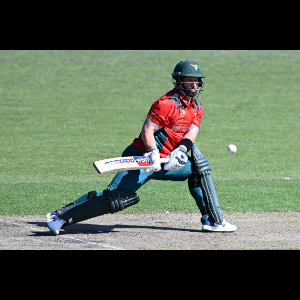


0: 640x640 1 person, 10.8ms
Speed: 3.3ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Predicted class: sweep, Confidence: 1.00


In [133]:
import random

shots_map_rev = {
        0: "drive",
        1: "sweep",
        2: "cutshot",
        3: "pullshot"
}

for i in range(10):
    image_index = random.randint(0,800)
    image = images[image_index]
    # Example prediction
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    test_image_path = image
    cv2_imshow(test_image_path)
    predicted_class, confidence = predict(trained_model, test_image_path, device)
    print(f"Predicted class: {shots_map_rev[predicted_class]}, Confidence: {confidence:.2f}")

In [139]:
len(all_labels)

800

In [145]:
# prompt: i want to print confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels = []
all_predictions = []
for i in range(800):
    image_index = random.randint(0,700)
    pred_labels.append(all_labels[i])
    image = images[i]
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    predicted_class, _ = predict(trained_model, image, device)
    all_predictions.append(predicted_class)

# Convert predictions and labels to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(pred_labels)




0: 640x640 1 person, 12.2ms
Speed: 4.0ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 8.3ms
Speed: 2.3ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0

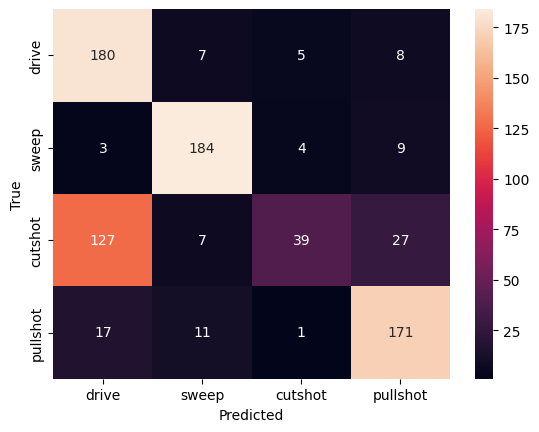

In [147]:
# prompt: i want to replace labels with actual name in confusion matric

import seaborn as sns
import matplotlib.pyplot as plt

# Define the labels
labels = ["drive", "sweep", "cutshot", "pullshot"]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

# Set labels for x and y axes
plt.xlabel("Predicted")
plt.ylabel("True")

# Show the plot
plt.show()


In [148]:
# prompt: Print classification report

from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_true, y_pred, target_names=labels)
print(report)


              precision    recall  f1-score   support

       drive       0.55      0.90      0.68       200
       sweep       0.88      0.92      0.90       200
     cutshot       0.80      0.20      0.31       200
    pullshot       0.80      0.85      0.82       200

    accuracy                           0.72       800
   macro avg       0.76      0.72      0.68       800
weighted avg       0.76      0.72      0.68       800

